In [1]:
#!pip install pandasql
import pandas as pd
import pandasql as ps
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
pd.options.display.max_columns = None   #display all columns in jupyter

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
main1=pd.read_csv('Performance left join jockey and trainers and horse infor.csv')
main1.head()

,Unnamed: 0,race_id,race,date,place,horse_id,horse_no,horse,jockey,trainer,actual_weight,declared_horse_weight,draw,lbw,running_position,win_odds,class,going,track,prize,location,distance_m,finish_time,finish_time_s,J_Win,J_Win_perc,J_2nd,J_2nd_perc,J_3rd,J_3rd_perc,J_4th,J_4th_perc,J_5th,J_5th_perc,J_ttl_rides,J_stakes_won,T_Win,T_Win_perc,T_2nd,T_2nd_perc,T_3rd,T_3rd_perc,T_4th,T_4th_perc,T_5th,T_5th_perc,T_ttl_runs,T_stakes_won,H_id,H_name,H_country,H_age,H_colour,H_sex,H_ImportType,H_season_stakes,H_ttl_stakes,H_no_of_1_2_3_Starts,H_no_of_starts_in_past10,H_curr_location,H_arr_date,H_trainer,H_owner,H_curr_rating,H_1920rating,H_sire,H_dam,H_damSire
0,0,1,1,2019-09-01 00:00:00.000,1,C127,3,GOOD RUNNERS WAY,Z Purton,C S Shum,131.0,1072.0,6,0.00,"['3', '3', '2', '1']",2.2,Class 5,GOOD,"TURF - ""B"" Course",725000,Sha Tin,1600,1900-01-01 00:01:35.480,95.48,147,21,101,14,100,14,56,8,66,9,707,"202,112,646",45,9,49,10,26,5,39,8,43,9,475,"69,711,815",C127,GOOD RUNNERS WAY,NZ,6.0,Bay,Gelding,PPG,0.0,1388520.0,"['2', '1', '2', '22']",0.0,Conghua,2020-03-04,C S Shum,Mr & Mrs Peter Chan On Tak and Robert Chan Chi...,34.0,34.0,Battle Paint,Ysa Post,Postponed
1,1,1,1,2019-09-01 00:00:00.000,2,C035,4,REGENCY GEM,J Moreira,W Y So,129.0,1179.0,7,0.10,"['9', '8', '8', '2']",4.9,Class 5,GOOD,"TURF - ""B"" Course",725000,Sha Tin,1600,1900-01-01 00:01:35.500,95.50,138,19,123,17,91,13,68,9,66,9,719,"206,911,366",31,7,28,7,33,8,33,8,28,7,426,"35,330,615",C035,REGENCY GEM,NZ,6.0,Bay,Gelding,PPG,0.0,1016240.0,"['1', '2', '2', '19']",0.0,Hong Kong,2020-07-02,W Y So,Wendy Wong Yin Ting & Owen Cheng Ho Wang,40.0,40.0,Showcasing,The Myth,Cape Cross
2,2,1,1,2019-09-01 00:00:00.000,3,V406,7,PROUD SKY,K Teetan,L Ho,121.0,1053.0,4,0.50,"['5', '4', '3', '3']",18.0,Class 5,GOOD,"TURF - ""B"" Course",725000,Sha Tin,1600,1900-01-01 00:01:35.570,95.57,93,13,75,10,81,11,81,11,72,10,719,"138,503,489",15,4,28,7,17,4,36,8,20,5,427,"21,136,215",V406,PROUD SKY,GB,7.0,Bay,Gelding,PP,0.0,1780625.0,"['3', '0', '1', '42']",0.0,Hong Kong,2016-06-25,L Ho,Francis Wong Shing Yick & Raymond Wong Kai Yuen,24.0,24.0,Acclamation,Claiomh Solais,Galileo
3,3,1,1,2019-09-01 00:00:00.000,4,V369,2,LE PANACHE,A Sanna,D J Whyte,132.0,1076.0,3,1.25,"['4', '6', '6', '4']",5.7,Class 5,GOOD,"TURF - ""B"" Course",725000,Sha Tin,1600,1900-01-01 00:01:35.680,95.68,9,8,4,3,9,8,7,6,10,8,120,"10,735,300",44,9,41,9,38,8,47,10,40,9,466,"51,039,432",V369,LE PANACHE,IRE,NaN,Bay,Gelding,PP,NaN,2501500.0,"['2', '6', '5', '42']",0.0,NaN,NaN,NaN,Kok Jian Pei,NaN,38.0,Acclamation,Heavens Peak,Pivotal
4,4,1,1,2019-09-01 00:00:00.000,5,V400,1,GOLD VELVET,L Hewitson,A T Millard,133.0,1155.0,8,1.50,"['8', '7', '7', '5']",7.0,Class 5,GOOD,"TURF - ""B"" Course",725000,Sha Tin,1600,1900-01-01 00:01:35.710,95.71,3,1,9,4,11,4,14,6,10,4,251,"7,362,155",30,9,28,8,33,10,23,7,25,7,346,"37,234,605",V400,GOLD VELVET,NZ,NaN,Bay / Brown,Gelding,PPG,NaN,2005145.0,"['2', '4', '3', '34']",0.0,NaN,NaN,NaN,"Gibson Lau Wai Chi, Eric Lau Pui Kit & Ricky L...",NaN,42.0,Savabeel,Girls On Top,O'Reilly


In [3]:
#Create table for Horse Analysis
Horse_WinOdd_WinPerc=main1[['win_odds','H_1920rating','race_id','horse_id']].groupby('horse_id').agg({'win_odds':'mean','H_1920rating':'mean','race_id':'count'})
Horse_WinOdd_WinPerc.columns=['Avg_win_odds', 'Avg_Horse_Rating', 'Match_count']

In [4]:
Horse_WinOdd_WinPerc['Avg_Horse_Rating'].nlargest()

horse_id
V380    130.0
B101    129.0
A238    127.0
V397    127.0
A299    126.0
Name: Avg_Horse_Rating, dtype: float64

In [5]:
#75% percentile include in the case
Horse_WinOdd_WinPerc['Match_count'].quantile(q=0.25)

4.0

In [6]:
#Horse races at least 4 times
Horse_WinOdd_WinPerc1=Horse_WinOdd_WinPerc[Horse_WinOdd_WinPerc['Match_count']>4]

Text(0, 0.5, 'Win Odds')

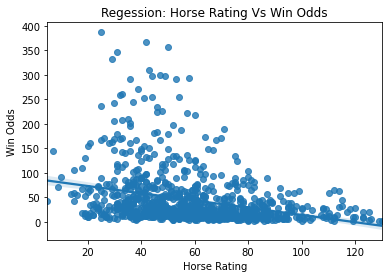

In [15]:
#Regression Plot
sns.regplot(Horse_WinOdd_WinPerc1['Avg_Horse_Rating'],Horse_WinOdd_WinPerc1['Avg_win_odds']).set_title('Regession: Horse Rating Vs Win Odds')
plt.xlabel('Horse Rating')
plt.ylabel('Win Odds')

In [8]:
#Regession Formula
from scipy.stats import linregress
linregress(Horse_WinOdd_WinPerc1['Avg_Horse_Rating'],Horse_WinOdd_WinPerc1['Avg_win_odds'])

LinregressResult(slope=-0.7385512777008024, intercept=88.01512586108674, rvalue=-0.29548192588428795, pvalue=4.6794922301300555e-21, stderr=0.07663053658516099)

In [9]:
#Use Formula to predict WinOdds
Horse_WinOdd_WinPerc1['ExpectWinOdds']=Horse_WinOdd_WinPerc1['Avg_Horse_Rating'].apply(lambda x: x*-0.74+88)

In [10]:
#compare WinOdds
Horse_WinOdd_WinPerc1['Diff']=Horse_WinOdd_WinPerc1['ExpectWinOdds']-Horse_WinOdd_WinPerc1['Avg_win_odds']

In [17]:
#Don't bet on Z Purton and J Moreira
a=Horse_WinOdd_WinPerc1.sort_values(by=['Avg_Horse_Rating', 'Diff'], ascending=False).head()
a2=a[['Avg_Horse_Rating','Diff']]
a2.columns=['Horse Rating','Estimated Win Odds agianst Public']
a2

,Horse Rating,Estimated Win Odds agianst Public
horse_id,,
V380,130.0,-10.125000
B101,129.0,-9.331429
A299,126.0,-10.315000
C150,125.0,-8.557143
A252,125.0,-25.025000


In [18]:
#List of Recommend Top 10 Horse to bet
b=Horse_WinOdd_WinPerc1[Horse_WinOdd_WinPerc1['Diff']>0].sort_values(by=['Diff'], ascending=False)[0:10]
b2=b[['Avg_Horse_Rating','Diff']]
b2.columns=['Horse_Rating','Estimated Win Odds agianst Public']
b2

,Horse_Rating,Estimated Win Odds agianst Public
horse_id,,
A186,20.0,62.980000
B395,20.0,62.770000
V143,19.0,62.482857
B182,25.0,62.216667
A277,28.0,61.040000
C096,31.0,59.387273
B107,20.0,59.266667
A031,27.0,57.426667
B425,22.0,57.374545


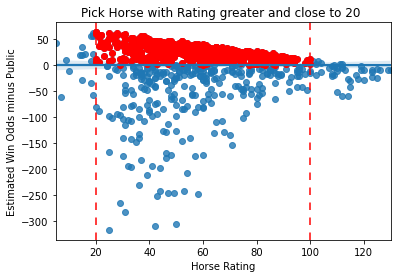

In [20]:
#Try bet on rating between 20 to 100
#Regression Plot
sns.regplot(Horse_WinOdd_WinPerc1['Avg_Horse_Rating'],Horse_WinOdd_WinPerc1['Diff']).set_title('Pick Horse with Rating greater and close to 20 ')
plt.xlabel('Horse Rating')
plt.ylabel('Estimated Win Odds minus Public')
plt.axvline(20,color='red',dashes=(5, 5))
plt.axvline(100,color='red',dashes=(5, 5))
df = Horse_WinOdd_WinPerc1.query('Avg_Horse_Rating >=20 & Avg_Horse_Rating  <=100 & Diff>0')
plt.scatter(df['Avg_Horse_Rating'], df['Diff'],  color="red")


Text(0.5, 1.0, 'lalala')

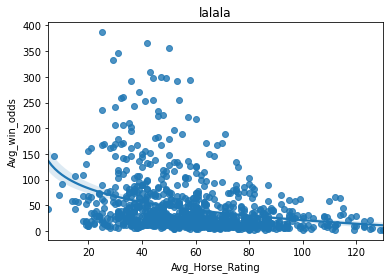

In [14]:
#Test of Log
sns.regplot(Horse_WinOdd_WinPerc1['Avg_Horse_Rating'],Horse_WinOdd_WinPerc1['Avg_win_odds'],logx=True).set_title('lalala')